# ME 6210 Lab Notes

Lab 2
===

Frequency Domain Identification Techniques
----------------------------------------------------


In [68]:
%load_ext autoreload
%autoreload 2
import vibration_toolbox as vtb
#from vibration_toolbox import sdof_cf
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as math
import scipy.linalg as la

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Geometry and Material Properties
-------------------------------------

In [69]:

n=40#no: of amplitudes to be considered in the experimental plots for analysis

Plotting Experimental Data
------------------------------

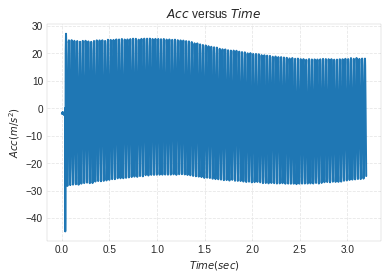

In [70]:
# Acc vs Time

%matplotlib inline
mat_contents=sio.loadmat('Case2-1.mat')
Time = mat_contents['Time_domain']
b = mat_contents['Time_chan_2']
# The acceleration values from Bobcat will be in Gs. So,  to convert them to m/s^2,
# we will have to multiply the vector by 9.81
Acc=b*9.81 
plt.plot(Time,Acc)
plt.grid('on')
plt.ylabel('$Acc(m/s^2)$')
plt.xlabel('$Time(sec)$')
plt.title('$Acc$ versus $Time$')
plt.show()

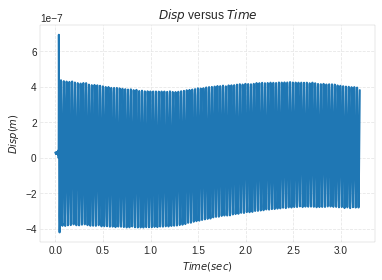

In [71]:
#  Disp vs Time

Td= (Time[n]-Time[0])/n
Wd=(2*math.pi)/Td
Disp=Acc/(-Wd**2)
plt.plot(Time,Disp)
plt.grid('on')
plt.ylabel('$Disp(m)$')
plt.xlabel('$Time(sec)$')
plt.title('$Disp$ versus $Time$')
plt.show()

    

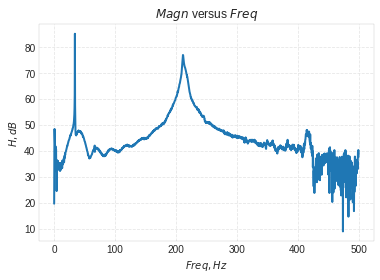

In [72]:
# Mag vs Freq

%matplotlib inline
mat_contents=sio.loadmat('Case2-2.mat')
c = mat_contents['Freq_domain']
d = mat_contents['Hf_chan_2']
H= (20)*(np.log10(np.abs(d)))
plt.plot(c,H)
plt.grid('on')
plt.xlabel('$Freq,Hz$')
plt.ylabel('$H,dB$')
plt.title('$Magn$ versus $Freq$')
plt.show()

Experimental Data Analysis
------------------------------

Using Log Decrement
-----------------------

In [73]:
delta= (1/n)*(math.log(Disp[0]/Disp[n-1]))
delta

0.0038640534923340686

In [74]:
Td= (Time[n]-Time[0])/n
Td

array([ 0.00078125], dtype=float32)

In [75]:
Wd=(2*math.pi)/Td
Wd

array([ 8042.48095703], dtype=float32)

In [76]:
zeta=(delta)/(math.sqrt((4*(math.pi)**2)+(delta)**2))
zeta

0.0006149830973818369

In [77]:
Wn=(Wd)/(math.sqrt(1-(zeta)**2))
#wn=Wn/(2*math.pi)
Wn

array([ 8042.48242188], dtype=float32)

In [78]:
ccr=2*m*Wn
m

NameError: name 'm' is not defined

Using Quadrature Peak Picking
-----------------------------------

In [79]:
Hd=max(H)
fd=c[np.where(H==Hd)]
Hd1=Hd/(2)**(1/2)
#fd1=c[np.where((H>=Hd1-1) & (H<=Hd1+1))]
#d1=c[np.where(H==Hd1)]
fa=33.7
fb=34.43
wa=(2*math.pi*fa)
wb=(2*math.pi*fb)
wdQ=(2*math.pi*fd)
zetaQ=(wb-wa)/(2*wdQ)
wnQ=(wdQ)/((1-(zetaQ)**2))**(1/2)
fnQ=wnQ/(2*math.pi)
fd

array([ 34.0625], dtype=float32)

In [80]:
zetaQ

array([ 0.0107156], dtype=float32)

In [81]:
fnQ

array([ 34.06445694], dtype=float32)

Using Vibration Toolbox
-------------------------------

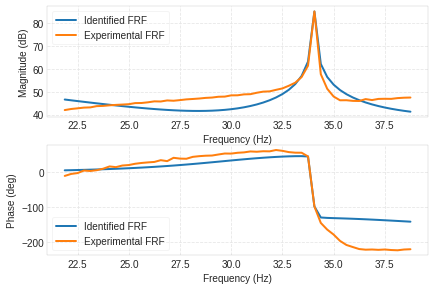

In [82]:
    %matplotlib inline
    mat_contents=sio.loadmat('Case2-2.mat')
    f = mat_contents['Freq_domain']
    TF = mat_contents['Hf_chan_2']
    Fmin=70
    Fmax=125
    if Fmin is None:
        inlow = 0
    else:
        inlow = Fmin
    
    if Fmax is None:
        inhigh = np.size(f)
    else:
        inhigh = Fmax
    
    if f[inlow] == 0:
        inlow = 1
    
    f = f[inlow:inhigh,:]
    TF = TF[inlow:inhigh,:]
    
    R = TF
    y = np.amax(np.abs(TF))
    cin = np.argmax(np.abs(TF))
    
    #works
    
    ll = np.size(f)
    
    w = f*2*np.pi*1j
    
    w2 = w*0
    R3 = R*0
    
    for i in range(1, ll+1):
        R3[i-1] = np.conj(R[ll-i])
        w2[i-1] = np.conj(w[ll-i])
#    for i in range(0, ll):
#        print(i)
#        R3[i] = np.conj(R[ll-i])
#        w2[i] = np.conj(w[ll-i])

    w = np.vstack((w2,w))
    R = np.vstack((R3,R))
    
    
    N = 2
    x, y = np.meshgrid(np.arange(0,N+1),R)
    x, w2d = np.meshgrid(np.arange(0,N+1),w)
    c = -1*w**N*R
#    c = np.ndarray.flatten(c)

#    print(w2d.shape)
#    input()
#    print(w2d[:,np.arange(0,N+1)].shape)
#    print(x[:,np.arange(0,N+1)].shape)
#    input()
    aa1 = w2d[:,np.arange(0,N)] \
              **x[:,np.arange(0,N)] \
              *y[:,np.arange(0,N)]
    aa2 = -w2d[:,np.arange(0,N+1)] \
              **x[:,np.arange(0,N+1)]
    aa = np.hstack((aa1,aa2))
    
    aa = np.reshape(aa,[-1,5])
#    c = np.mat(c).T
    
    #np.linalg.division()
#    scalef = np.abs(np.min(aa)-np.max(aa))
    b,_,_,_ = la.lstsq(aa,c)

    #temporary
#    b = np.array([[1.7914*10**6+4.5242*10**-1*1j],[-.1668+.0003*1j],[.0000+.0000*1j],[-1.0038*10**4-8.8731*10**-3*1j],[14.8662-.0000*1j]])
#    print(b.shape)
#    input() 
#    sel = np.arange(N-1,-1,-1)
#    print(sel)
#    print(np.vstack((1,b[sel])))
#    print(np.vstack(([1],b[np.arange(N-1,-1,-1)])))
#    print(np.ndim(np.ndarray.flatten(np.vstack(([1],b[np.arange(N-1,-1,-1)])))))
#    input()


#   Due to numpy adding an invisible extra dimension when vstacking I had to
#   flatten the array.
#   THE FOLLOWING LINE IS HORRIBLE HACKER CODE. KILL IT WITH FIRE.
    rs = np.roots(np.ndarray.flatten(np.vstack(([1],b[np.arange(N-1,-1,-1)]))))
#    print(rs)
#    input()

#    irs = np.argsort(np.abs(np.imag(rs)))
#    print(irs)
#    input()
    
#    rs = rs[irs]
#    print(rs)
#    input()
    omega = np.abs(rs[1])
    z = -1*np.real(rs[1])/np.abs(rs[1])
    nf = omega/2/np.pi

    XoF1 = np.hstack(([1/(w-rs[0]), 1/(w-rs[1])]))
    XoF2 = 1/(w**0)
    XoF3 = 1/w**2
#    print(XoF1)
#    print(XoF2)
#    print(XoF3)
#    input()
    XoF = np.hstack((XoF1, XoF2, XoF3))
    
    #check if extra _ needed

    a,_,_,_ = la.lstsq(XoF,R)
 #   a = np.array([[-7.8133*10**2+9.7895j*10**2],[-7.8023*10**2-9.7861j*10**2],[-1.7281-.0003j],[2.7703*10**2+3.2313j*10**-3]])
    XoF = XoF[np.arange(ll,2*ll),:].dot(a)
#    print(a)
#    print(ll)
#    print(XoF)
#    input()
    a = np.sqrt(-2*np.imag(a[0])*np.imag(rs[0])-2*np.real(a[0])*np.real(rs[0]))
    Fmin = np.min(f)
    Fmax = np.max(f)
    phase = np.unwrap(np.angle(TF),np.pi,0)*180/np.pi
    phase2 = np.unwrap(np.angle(XoF),np.pi,0)*180/np.pi
#    phase3 = np.angle(TF)*180/np.pi
    
#    print(TF)
#    print(np.angle(TF))
#    print(np.unwrap(np.angle(TF)))
#    print(phase2)
#    input()    
    while phase2[cin] > 50:
        phase2 = phase2 - 360
    phased = phase2[cin]-phase[cin]
    phase = phase+np.round(phased/360)*360
   
    #plot stuff
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    fig.tight_layout()
    
#    ax1.set_legend('Identified FRF','Experimental FRF')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.plot(f,20*np.log10(np.abs(XoF)), label="Identified FRF")
    ax1.plot(f,20*np.log10(np.abs(TF)), label="Experimental FRF")
    ax1.legend()
#    ax1.grid()

    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Phase (deg)')
    ax2.plot(f,phase2, label="Identified FRF")
    ax2.plot(f,phase, label="Experimental FRF")
    ax2.legend()
#    ax2.plot(f,phase)
#    ax2.grid()
    
    _ = plt.show()
    
    a = a[0]**2/(2*np.pi*nf)**2

In [83]:
z

0.00038369496272758913

In [84]:
nf

34.042986534079276

/home/sainag/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in sqrt


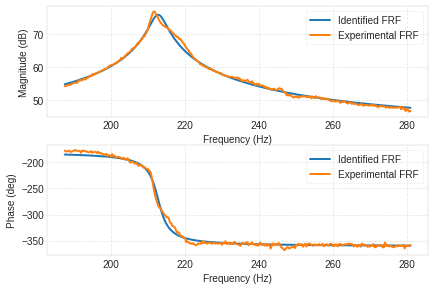

In [85]:
    %matplotlib inline
    mat_contents=sio.loadmat('Case2-2.mat')
    f = mat_contents['Freq_domain']
    TF = mat_contents['Hf_chan_2']
    Fmin=600
    Fmax=900
    if Fmin is None:
        inlow = 0
    else:
        inlow = Fmin
    
    if Fmax is None:
        inhigh = np.size(f)
    else:
        inhigh = Fmax
    
    if f[inlow] == 0:
        inlow = 1
    
    f = f[inlow:inhigh,:]
    TF = TF[inlow:inhigh,:]
    
    R = TF
    y = np.amax(np.abs(TF))
    cin = np.argmax(np.abs(TF))
    
    #works
    
    ll = np.size(f)
    
    w = f*2*np.pi*1j
    
    w2 = w*0
    R3 = R*0
    
    for i in range(1, ll+1):
        R3[i-1] = np.conj(R[ll-i])
        w2[i-1] = np.conj(w[ll-i])
#    for i in range(0, ll):
#        print(i)
#        R3[i] = np.conj(R[ll-i])
#        w2[i] = np.conj(w[ll-i])

    w = np.vstack((w2,w))
    R = np.vstack((R3,R))
    
    
    N = 2
    x, y = np.meshgrid(np.arange(0,N+1),R)
    x, w2d = np.meshgrid(np.arange(0,N+1),w)
    c = -1*w**N*R
#    c = np.ndarray.flatten(c)

#    print(w2d.shape)
#    input()
#    print(w2d[:,np.arange(0,N+1)].shape)
#    print(x[:,np.arange(0,N+1)].shape)
#    input()
    aa1 = w2d[:,np.arange(0,N)] \
              **x[:,np.arange(0,N)] \
              *y[:,np.arange(0,N)]
    aa2 = -w2d[:,np.arange(0,N+1)] \
              **x[:,np.arange(0,N+1)]
    aa = np.hstack((aa1,aa2))
    
    aa = np.reshape(aa,[-1,5])
#    c = np.mat(c).T
    
    #np.linalg.division()
#    scalef = np.abs(np.min(aa)-np.max(aa))
    b,_,_,_ = la.lstsq(aa,c)

    #temporary
#    b = np.array([[1.7914*10**6+4.5242*10**-1*1j],[-.1668+.0003*1j],[.0000+.0000*1j],[-1.0038*10**4-8.8731*10**-3*1j],[14.8662-.0000*1j]])
#    print(b.shape)
#    input() 
#    sel = np.arange(N-1,-1,-1)
#    print(sel)
#    print(np.vstack((1,b[sel])))
#    print(np.vstack(([1],b[np.arange(N-1,-1,-1)])))
#    print(np.ndim(np.ndarray.flatten(np.vstack(([1],b[np.arange(N-1,-1,-1)])))))
#    input()


#   Due to numpy adding an invisible extra dimension when vstacking I had to
#   flatten the array.
#   THE FOLLOWING LINE IS HORRIBLE HACKER CODE. KILL IT WITH FIRE.
    rs = np.roots(np.ndarray.flatten(np.vstack(([1],b[np.arange(N-1,-1,-1)]))))
#    print(rs)
#    input()

#    irs = np.argsort(np.abs(np.imag(rs)))
#    print(irs)
#    input()
    
#    rs = rs[irs]
#    print(rs)
#    input()
    omega = np.abs(rs[1])
    z = -1*np.real(rs[1])/np.abs(rs[1])
    nf = omega/2/np.pi

    XoF1 = np.hstack(([1/(w-rs[0]), 1/(w-rs[1])]))
    XoF2 = 1/(w**0)
    XoF3 = 1/w**2
#    print(XoF1)
#    print(XoF2)
#    print(XoF3)
#    input()
    XoF = np.hstack((XoF1, XoF2, XoF3))
    
    #check if extra _ needed

    a,_,_,_ = la.lstsq(XoF,R)
 #   a = np.array([[-7.8133*10**2+9.7895j*10**2],[-7.8023*10**2-9.7861j*10**2],[-1.7281-.0003j],[2.7703*10**2+3.2313j*10**-3]])
    XoF = XoF[np.arange(ll,2*ll),:].dot(a)
#    print(a)
#    print(ll)
#    print(XoF)
#    input()
    a = np.sqrt(-2*np.imag(a[0])*np.imag(rs[0])-2*np.real(a[0])*np.real(rs[0]))
    Fmin = np.min(f)
    Fmax = np.max(f)
    phase = np.unwrap(np.angle(TF),np.pi,0)*180/np.pi
    phase2 = np.unwrap(np.angle(XoF),np.pi,0)*180/np.pi
#    phase3 = np.angle(TF)*180/np.pi
    
#    print(TF)
#    print(np.angle(TF))
#    print(np.unwrap(np.angle(TF)))
#    print(phase2)
#    input()    
    while phase2[cin] > 50:
        phase2 = phase2 - 360
    phased = phase2[cin]-phase[cin]
    phase = phase+np.round(phased/360)*360
   
    #plot stuff
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    fig.tight_layout()
    
#    ax1.set_legend('Identified FRF','Experimental FRF')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.plot(f,20*np.log10(np.abs(XoF)), label="Identified FRF")
    ax1.plot(f,20*np.log10(np.abs(TF)), label="Experimental FRF")
    ax1.legend()
#    ax1.grid()

    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Phase (deg)')
    ax2.plot(f,phase2, label="Identified FRF")
    ax2.plot(f,phase, label="Experimental FRF")
    ax2.legend()
#    ax2.plot(f,phase)
#    ax2.grid()
    
    _ = plt.show()
    
    a = a[0]**2/(2*np.pi*nf)**2

In [86]:
z

0.0098528467844860128

In [87]:
nf

212.75444783266499

In [88]:
%matplotlib inline
mat_contents=sio.loadmat('Case2-2.mat')
f = mat_contents['Freq_domain']
TF = mat_contents['Hf_chan_2']
Fmin=20
Fmax=200
vtb.sdof_cf(f,TF,Fmin,Fmax)

AttributeError: module 'vibration_toolbox' has no attribute 'sdof_cf'

Beam Parameters
--------------------

In [89]:
E=7.31e10 #young's Modulus
b1=0.0254 #width
h=0.0127 #height
l=0.5524 #length
r=2.7*(10**3) #Density
A=b1*h #Cross-sectional area
v=l*b1*h #volume
m=r*v #mass
I=(1/12)*b1*(h**3) #Area moment of inertia

Close form Euler-Bernoulli solution
-------------------------------------------

In [90]:
betal= 1.87510407
beta1=betal/l 
wnA1=((beta1)**2/(2*math.pi))*(((E*I)/(r*A)))**(1/2)
wnA1

34.98270993916083

In [91]:
betal= 4.69409113
beta2=betal/l 
wnA2=((beta2)**2/(2*math.pi))*(((E*I)/(r*A)))**(1/2)
wnA2

219.23290036128418

Transverse Displacement at beam center using VTB
---------------------------------------------------------

array([ 3761.41692009])

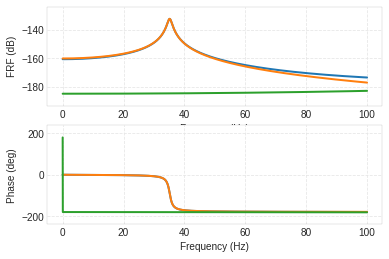

In [92]:
vtb.euler_beam_frf(xin=l, xout=l/2, fmin=0.0, fmax=100.0, zeta=0.02,
                   bctype=2, npoints=1601,
                   beamparams=np.array([E, I,
r, A, l]))
admittanceCen = np.abs(H[1600])
excitationforce=100
displacementCen = admittanceCen*excitationforce
displacementCen

Transverse Displacement at beam tip using VTB
---------------------------------------------------------

array([ 3761.41692009])

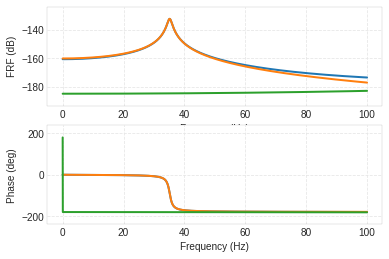

In [93]:
vtb.euler_beam_frf(xin=l/2, xout=l, fmin=0.0, fmax=100.0, zeta=0.02,
                   bctype=2, npoints=1600,
                   beamparams=np.array([E, I,
r, A, l]))

admittanceEnd = np.abs(H[1600])
excitationforce=100
displacementEnd = admittanceEnd*excitationforce
displacementEnd
#admittanceEnd